# Women, Business & Law
Measuring gender equality globally

WBL 2020 is the sixth in the series of biannual reports measuring gender differences in the law. In 2019 a study was released which piloted a new index that aggregates 35 data points across 8 scored indicators. The WBL index scores are based on the average of each economy’s scores for the 8 topics included in this year’s aggregate score. A higher score indicates more gender equal laws. The dataset was expanded in 2020 to include historical information dating back to 1970. This file contains Women, Business and the Law (WBL) data for 190 economies for 1970 to 2019 (reporting years 1971 to 2020). 

For more information about the methodology for data collection, scoring and analysis, visit http://wbl.worldbank.org.

This data source is so rich that enables multiple approaches of analysis, so I decided to reuse it for this week's assignment. 

# Setup

In [1]:
# install needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import fill
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# load data using pandas
wbl_data = pd.read_excel("wbl_data_50yearpanel_web_27feb2020.xlsx")

In [3]:
#show head and tail to make sure data is formatted correctly (no add'l headers/total lines)
wbl_data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
1,AFG1972,Afghanistan,AFG,South Asia,Low income,1972,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
2,AFG1973,Afghanistan,AFG,South Asia,Low income,1973,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
3,AFG1974,Afghanistan,AFG,South Asia,Low income,1974,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
4,AFG1975,Afghanistan,AFG,South Asia,Low income,1975,26.3,25,No,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No


In [4]:
wbl_data.tail()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
9495,ZWE2016,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2016,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9496,ZWE2017,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2017,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9497,ZWE2018,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2018,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9498,ZWE2019,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2019,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes
9499,ZWE2020,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,2020,86.9,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,100,Yes,Yes,Yes,Yes


In [5]:
#describe quantitative variables to understand distribution of values
wbl_data.describe()

,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000,9500.000000
mean,1995.500000,59.126326,82.044737,40.944737,46.186842,61.810526,33.932632,72.010526,75.067368,60.889474
std,14.431629,18.058837,25.891629,32.477038,30.896172,29.475642,30.051149,20.924141,27.766750,29.110644
min,1971.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,46.900000,75.000000,25.000000,25.000000,40.000000,0.000000,75.000000,60.000000,25.000000
50%,1995.500000,58.800000,100.000000,25.000000,50.000000,80.000000,20.000000,75.000000,80.000000,75.000000
75%,2008.000000,71.300000,100.000000,50.000000,75.000000,80.000000,60.000000,75.000000,100.000000,75.000000
max,2020.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# WBL by Region & Topic in 2020

Based on last week's assignment, I learned that region may be a more insightful way to slice the data, with 5/6 of the lowest economies categorized within the Middle East/Northern Africa. So this week, I'd like to look at WBL by region, breaking out the different WBL topics within each region. Hopefully this will provide a better understanding of what areas around the world have more opportunity for improvement. 

In [6]:
#create subset of data, filtering just for 2020
data = wbl_data[wbl_data['WBL Report Year'] == 2020]
data.head()

,ID,Economy,Code,Region,Income group,WBL Report Year,WBL INDEX,MOBILITY,Fam_CM_Passport,Fam_CM_TravelAbroad,...,Fam_AM_RightsImmovables,Fam_AM_InheritanceChildren,Fam_AM_InheritanceSpouses,Fam_AM_PropertyAdministration_formula,Fam_AM_NonmonetaryContributions,PENSION,Ages full benefits scored,Ages partial benefits scored,Ages mandatory retirement scored,Pension care credit
49,AFG2020,Afghanistan,AFG,South Asia,Low income,2020,38.1,50,Yes,Yes,...,Yes,No,No,Yes,No,25,No,No,Yes,No
99,AGO2020,Angola,AGO,Sub-Saharan Africa,Lower middle income,2020,73.1,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,25,No,Yes,No,No
149,ALB2020,Albania,ALB,Europe & Central Asia,Upper middle income,2020,91.3,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,50,No,No,Yes,Yes
199,ARE2020,United Arab Emirates,ARE,Middle East & North Africa,High income,2020,56.3,25,Yes,No,...,Yes,No,No,Yes,No,100,Yes,Yes,Yes,Yes
249,ARG2020,Argentina,ARG,Latin America & Caribbean,Upper middle income,2020,76.3,100,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,50,No,Yes,Yes,No


In [7]:
#describe data to understand distribution of values and validate subset has been performed correctly
data.describe()

,WBL Report Year,WBL INDEX,MOBILITY,WORKPLACE,PAY,MARRIAGE,PARENTHOOD,ENTREPRENEURSHIP,ASSETS,PENSION
count,190.0,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2020.0,75.246316,87.236842,78.421053,66.052632,78.526316,53.894737,82.763158,81.789474,73.157895
std,0.0,17.313009,22.964701,30.125515,29.527986,28.543791,31.143795,16.930349,25.426685,26.413006
min,2020.0,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,65.325000,75.000000,50.000000,50.000000,60.000000,20.000000,75.000000,60.000000,50.000000
50%,2020.0,78.800000,100.000000,100.000000,75.000000,100.000000,60.000000,75.000000,100.000000,75.000000
75%,2020.0,86.900000,100.000000,100.000000,100.000000,100.000000,80.000000,100.000000,100.000000,100.000000
max,2020.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
data_pivot = pd.DataFrame.pivot_table(data, index=['Region'], 
                                      values=['WBL INDEX',
                                     'MOBILITY',
                                     'WORKPLACE',
                                     'PAY',
                                     'MARRIAGE',
                                     'PARENTHOOD',
                                     'ENTREPRENEURSHIP',
                                     'ASSETS',
                                     'PENSION'], aggfunc='mean')

data_pivot

,ASSETS,ENTREPRENEURSHIP,MARRIAGE,MOBILITY,PARENTHOOD,PAY,PENSION,WBL INDEX,WORKPLACE
Region,,,,,,,,,
East Asia & Pacific,76.800000,82.000000,86.40,89.000000,35.200000,67.00000,66.000000,71.316000,68.000000
Europe & Central Asia,100.000000,93.000000,96.80,99.000000,80.000000,66.00000,54.000000,84.240000,85.000000
High income: OECD,98.750000,95.312500,95.00,100.000000,90.000000,89.84375,90.625000,94.659375,97.656250
Latin America & Caribbean,98.125000,82.812500,88.75,92.187500,45.000000,69.53125,80.468750,79.203125,76.562500
Middle East & North Africa,43.000000,80.000000,33.00,52.500000,33.000000,37.50000,58.750000,49.575000,58.750000
South Asia,55.000000,71.875000,70.00,90.625000,30.000000,46.87500,50.000000,62.362500,84.375000
Sub-Saharan Africa,73.333333,72.395833,67.50,82.291667,44.583333,62.50000,80.208333,69.872917,76.041667


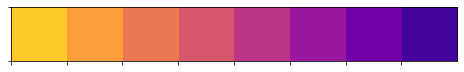

In [9]:
colors = sns.color_palette("plasma_r",8)
sns.palplot(colors)

Text(0.5, 1.0, 'Avg WBL Score by Region & Topic')

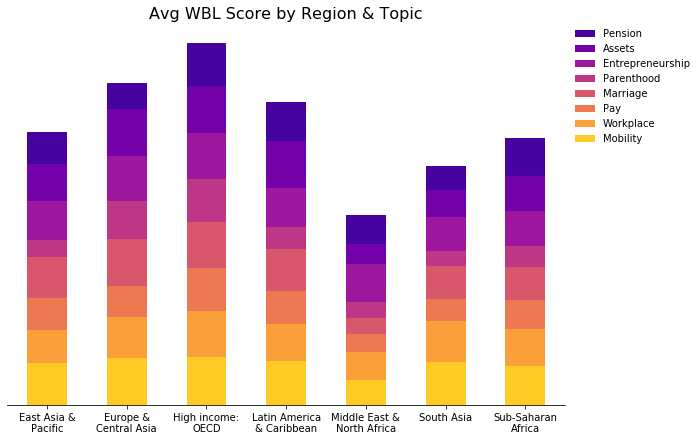

In [10]:
fig, ax = plt.subplots(figsize=(10,7))  

topics = ['MOBILITY',
         'WORKPLACE',
         'PAY',
         'MARRIAGE',
         'PARENTHOOD',
         'ENTREPRENEURSHIP',
         'ASSETS',
         'PENSION']

margin_bottom = np.zeros(len(data_pivot.index.drop_duplicates()))
xlabels = data_pivot.index.drop_duplicates()

for num, t in enumerate(topics):
    values = list(data_pivot[t])
    data_pivot[t].plot.bar(x=xlabels, y=t, ax=ax, stacked=True, bottom = margin_bottom, color=colors[num], label=t)
    margin_bottom += values
    
sns.despine(left=True)
ax.axes.get_yaxis().set_visible(False)

regions_wrap = [fill(r, 14) for r in xlabels]
ax.set_xticklabels(labels = regions_wrap, rotation=0)
ax.set(xlabel='')

topics_lgd = []
for t in topics:
    topics_lgd.append(t.capitalize())
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], topics_lgd[::-1], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., frameon=False)
plt.title('Avg WBL Score by Region & Topic', fontsize=16)




# WBL by Topic & Region in 2020
As expected, the Middle East yielded the lowest average WBL score across the regions. What is interesting, is that Entrepreneurship gender equality is supported the most within this region, while it appears Parenthood & Marriage equality are supported the least. However, as we learned in the Week 2 submission, Parenthood offers the greates room for improvement, with little implementation of 'parental leave' across the globe. 

Therefore, I'm interested to know how this graph looks if transposed - x-axis shows Topics while stacked by Region. Then we can see how the Middle East performs against other nations in a more normalized way.

In [11]:
data_topics = data_pivot.sort_values(by=['WBL INDEX'], ascending=False)
data_topics

,ASSETS,ENTREPRENEURSHIP,MARRIAGE,MOBILITY,PARENTHOOD,PAY,PENSION,WBL INDEX,WORKPLACE
Region,,,,,,,,,
High income: OECD,98.750000,95.312500,95.00,100.000000,90.000000,89.84375,90.625000,94.659375,97.656250
Europe & Central Asia,100.000000,93.000000,96.80,99.000000,80.000000,66.00000,54.000000,84.240000,85.000000
Latin America & Caribbean,98.125000,82.812500,88.75,92.187500,45.000000,69.53125,80.468750,79.203125,76.562500
East Asia & Pacific,76.800000,82.000000,86.40,89.000000,35.200000,67.00000,66.000000,71.316000,68.000000
Sub-Saharan Africa,73.333333,72.395833,67.50,82.291667,44.583333,62.50000,80.208333,69.872917,76.041667
South Asia,55.000000,71.875000,70.00,90.625000,30.000000,46.87500,50.000000,62.362500,84.375000
Middle East & North Africa,43.000000,80.000000,33.00,52.500000,33.000000,37.50000,58.750000,49.575000,58.750000


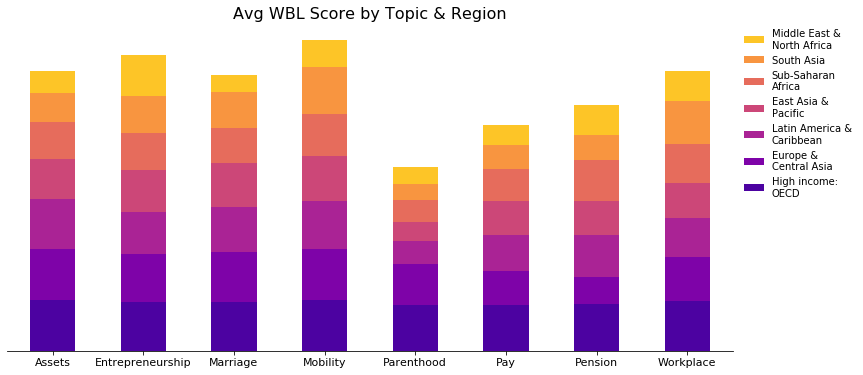

In [12]:
#create similar stacked bar but with Topics on x-axis stacked by Region
colors = sns.color_palette("plasma",7)
data_topics = data_pivot.sort_values(by=['WBL INDEX'], ascending=False)
data_topics = data_topics.drop(['WBL INDEX'], axis=1)

fig, ax = plt.subplots(figsize=(13,6))

regions = data_topics.index.drop_duplicates()

margin_bottom = np.zeros(len(topics))
xlabels = data_topics.columns.drop_duplicates()


for num, r in enumerate(regions):
    values = list(data_topics.loc[r])
    data_topics.loc[r].plot.bar(x=xlabels, y=r, ax=ax, stacked=True, bottom = margin_bottom, color=colors[num], label=r)
    margin_bottom += values
    
sns.despine(left=True)
ax.axes.get_yaxis().set_visible(False)

topics_cap = []
for t in xlabels:
    topics_cap.append(t.capitalize())
ax.set_xticklabels(labels = topics_cap, rotation=0, fontsize=11)
ax.set(xlabel='')


regions_lgd = [fill(r, 15) for r in regions]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], regions_lgd[::-1], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., frameon=False)
plt.title('Avg WBL Score by Topic & Region', fontsize=16)


#save figure
plt.savefig(fname='2020 WBL Stacked Bar Chart', bbox_inches='tight')

# Heat Map of Middle East economies & Marriage components

We can see in the previous figure that on average, the proportion of the Middle East's WBL scores to the rest of the regions is significantly lower for Assets, Marriage, Mobility and Workplace. Out of curiosity, I want to dive into what specific marriage-related policies do not exist within the Middle East.

In [13]:
#filter data to Middle East & Marriage

mideast = data[data['Region'] == 'Middle East & North Africa']
mideast = mideast.drop(['ID','Region','WBL Report Year'], axis=1)

#convert questions to boolean
mideast['Obedience_bool'] = np.where(mideast['Fam_MR_Obedience'] == "Yes", 1,0)
mideast['HeadHH_bool'] = np.where(mideast['Fam_CM_HOH'] == "Yes", 1,0)
mideast['DomViolence_bool'] = np.where(mideast['WBL_dv_Law- DomViolence'] == "Yes", 1,0)
mideast['Divorce_bool'] = np.where(mideast['Fam_R2D_ObtainDivorce'] == "Yes", 1,0)
mideast['Remarry_bool'] = np.where(mideast['Fam_R2D_Remarry'] == "Yes", 1,0)

#create dictionary for what each boolean question means - to be included in heat map
dict_marriage = {
    'Obedience_bool' : 'Married woman is not legally required to obey her husband',
    'HeadHH_bool' : 'Woman can be "head of household" similar to a man',
    'DomViolence_bool' : 'Legislation addressing domestic violence exists',
    'Divorce_bool' : 'Woman can obtain a judgment of divorce similar to a man',
    'Remarry_bool' : 'Woman has same rights to remarry as a man'
}

mideast = mideast.drop(['MOBILITY',
 'Fam_CM_Passport',
 'Fam_CM_TravelAbroad',
 'Fam_CM_LeaveMaritalHome',
 'Fam_CM_ChooseMaritalHome',
 'WORKPLACE',
 'Fam_CM_GetJob',
 'NonDiscrim in Employment',
 'WBL_dv_Law- SexHarWorkPlace',
 'WBL_dv_Law- SexHarWorkPlaceCrimPenCivRem',
 'PAY',
 'EqualRemunEqualValue',
 'NightHours',
 'Hazardous etc scored',
 'Industries scored',
 'Fam_MR_Obedience',
 'Fam_CM_HOH',
 'WBL_dv_Law- DomViolence',
 'Fam_R2D_ObtainDivorce',
 'Fam_R2D_Remarry',
 'PARENTHOOD',
 'Leave women days scored',
 'Maternity benefits scored',
 'Paternity scored',
 'Parental scored',
 'Dismissal Pregnant Women',
 'ENTREPRENEURSHIP',
 'Fam_CM_SignContract',
 'Fam_CM_RegisterBiz',
 'Fam_CM_OpenBankAccount',
 'Fam_A2F_Gender',
 'ASSETS',
 'Fam_AM_RightsImmovables',
 'Fam_AM_InheritanceChildren',
 'Fam_AM_InheritanceSpouses',
 'Fam_AM_PropertyAdministration_formula',
 'Fam_AM_NonmonetaryContributions',
 'PENSION',
 'Ages full benefits scored',
 'Ages partial benefits scored',
 'Ages mandatory retirement scored',
 'Pension care credit'], axis=1)

mideast.head()



,Economy,Code,Income group,WBL INDEX,MARRIAGE,Obedience_bool,HeadHH_bool,DomViolence_bool,Divorce_bool,Remarry_bool
199,United Arab Emirates,ARE,High income,56.3,40,0,1,1,0,0
849,Bahrain,BHR,High income,46.3,40,0,1,1,0,0
2149,Djibouti,DJI,Lower middle income,68.1,20,0,0,1,0,0
2349,Algeria,DZA,Upper middle income,57.5,60,1,1,1,0,0
2449,"Egypt, Arab Rep.",EGY,Lower middle income,45.0,0,0,0,0,0,0


In [14]:
#stack table

df=mideast.melt(id_vars=['Code', 'Economy','Income group','WBL INDEX','MARRIAGE'],
           value_vars=[
             'Obedience_bool',
             'HeadHH_bool',
             'DomViolence_bool',
             'Divorce_bool',
             'Remarry_bool'],  var_name='Question',value_name='Response')

df['Description'] = df['Question'].map(dict_marriage)

df


,Code,Economy,Income group,WBL INDEX,MARRIAGE,Question,Response,Description
0,ARE,United Arab Emirates,High income,56.3,40,Obedience_bool,0,Married woman is not legally required to obey ...
1,BHR,Bahrain,High income,46.3,40,Obedience_bool,0,Married woman is not legally required to obey ...
2,DJI,Djibouti,Lower middle income,68.1,20,Obedience_bool,0,Married woman is not legally required to obey ...
3,DZA,Algeria,Upper middle income,57.5,60,Obedience_bool,1,Married woman is not legally required to obey ...
4,EGY,"Egypt, Arab Rep.",Lower middle income,45.0,0,Obedience_bool,0,Married woman is not legally required to obey ...
...,...,...,...,...,...,...,...,...
95,SAU,Saudi Arabia,High income,70.6,60,Remarry_bool,0,Woman has same rights to remarry as a man
96,SYR,Syrian Arab Republic,Low income,36.9,40,Remarry_bool,0,Woman has same rights to remarry as a man
97,TUN,Tunisia,Lower middle income,70.0,60,Remarry_bool,0,Woman has same rights to remarry as a man
98,WBG,West Bank and Gaza,Lower middle income,26.3,20,Remarry_bool,0,Woman has same rights to remarry as a man


In [15]:
df.replace({'Economy': {'United Arab Emirates' : 'UAE', 
                         'Egypt, Arab Rep.' : 'Egypt', 
                         'Iran, Islamic Rep.' : 'Iran', 
                         'Syrian Arab Republic' : 'Syria', 
                         'West Bank and Gaza' : 'West Bank-Gaza', 
                         'Yemen, Rep.' : 'Yemen'}}, inplace=True)

heat = df.pivot('Description','Economy','Response')
heat

Economy,Algeria,Bahrain,Djibouti,Egypt,Iran,Iraq,Jordan,Kuwait,Lebanon,Libya,Malta,Morocco,Oman,Qatar,Saudi Arabia,Syria,Tunisia,UAE,West Bank-Gaza,Yemen
Description,,,,,,,,,,,,,,,,,,,,
Legislation addressing domestic violence exists,1,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0
Married woman is not legally required to obey her husband,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0
"Woman can be ""head of household"" similar to a man",1,1,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0
Woman can obtain a judgment of divorce similar to a man,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
Woman has same rights to remarry as a man,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


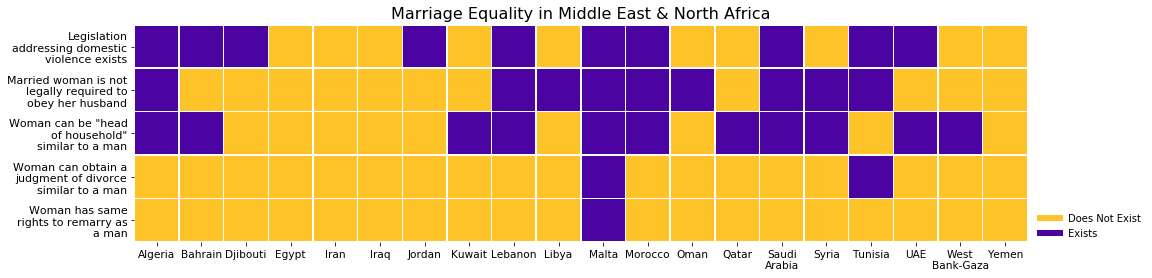

In [16]:
# create heat map indicating polices that do/don't exist by Middle Eastern economy within Marriage

fig, ht = plt.subplots(figsize=(16,4))


colors = sns.color_palette("plasma_r",7)
sns.heatmap(heat, linewidth = .5, cmap=colors, cbar=False)

desc = heat.index.drop_duplicates()
desc_wrap = [fill(d, 20) for d in desc]
ht.set_yticklabels(desc_wrap, fontsize=11)

econ = heat.columns.drop_duplicates()
# econ_wrap = [fill(e, 12) for e in econ]
# ht.set_xticklabels(econ_wrap, rotation=30, horizontalalignment='right')
econ_wrap = [fill(e, 9) for e in econ]
ht.set_xticklabels(econ_wrap, rotation=0, fontsize=10.5)
ht.set(xlabel='', ylabel='')

plt.title('Marriage Equality in Middle East & North Africa', fontsize=16)

#custom legend to show binary implication
custom_lines = [Line2D([0], [0], color=colors[0], lw=6),
                Line2D([0], [0], color=colors[6], lw=6)]
ht.legend(custom_lines, ['Does Not Exist','Exists'], bbox_to_anchor=(1.01, 0.15), loc=2, borderaxespad=0., frameon=False)

#save figure
plt.savefig(fname='2020 Middle East - Marriage', bbox_inches='tight')

In [17]:
# gather stats for slide


heat_econ = pd.DataFrame.pivot_table(df, index=['Economy'], values=['Response'], aggfunc='sum')
heat_econ = heat_econ.sort_values(by=['Response'], ascending=False)
heat_econ
print('Number of countries w/ at most 1 policy: ', sum(heat_econ.Response <= 1))

# dogvol = pd.DataFrame.pivot_table(data, index=['dog_id'], values=['flight_dt'], aggfunc='count')

# dogvol

Number of countries w/ at most 1 policy:  11


In [18]:
heat_desc = pd.DataFrame.pivot_table(df, index=['Description'], values=['Response'], aggfunc='sum')
# heat_desc = heat_econ.sort_values(by=['Response'], ascending=False)
heat_desc

,Response
Description,
Legislation addressing domestic violence exists,10
Married woman is not legally required to obey her husband,9
"Woman can be ""head of household"" similar to a man",11
Woman can obtain a judgment of divorce similar to a man,2
Woman has same rights to remarry as a man,1


In [19]:
print('Avg Marriage WBL score for the region: ', sum(df.Response)/len(df.Response))

Avg Marriage WBL score for the region:  0.33


# Takeaway

19/20 of the Middle East/North African countries have implemented <= 60% of the marriage-related gender equality policies. Even more alarming is that 11/20 of these countries have implemented at most 1 policy. 

Looking at this data by policy, the region is the most evolved when it comes to identifying women as the head of the household. If we take a look back at the stacked bar chart, the WBL score for Entrepreneurship is relatively high. This stat may correlate with economies legally recognizing a woman as the head of the household as they would a man. 

However, there is little litgation that exists regarding the interpersonal demeanor between husband and wife (50% or less). There may be an opportunity to improve this with recent surge in workplace sexual harassment policies (from Week 2 analysis).